# Business Understanding: Golf Play Decision
In many outdoor activities, weather conditions play a crucial role in decision-making processes. For golf enthusiasts and course managers, deciding whether the day's conditions are conducive to playing golf is essential. This decision affects not only players' experiences but also the management of resources at golf courses.

# Data Understanding
The dataset consists of historical records indicating whether golf was played under specific weather conditions. Each record includes:

1. Outlook: The general weather outlook (sunny, overcast, rain).
2. Temperature: The temperature in Fahrenheit.
3. Humidity: The humidity level as a percentage.
4. Wind: A boolean indicating the presence of strong wind.
This data will be used to train a predictive model to assist in decision-making.



# Manually extracted rules for predicting whether to 'Play' or not are as follows:

1. If the outlook is overcast, then the decision is yes, play regardless of other conditions.
2. If the outlook is rainy and it is not windy, then play.
3. If the outlook is rainy and it is windy, then do not play.
4. If the outlook is sunny and the humidity is greater than 77.5, then do not play.
5. If the outlook is sunny and the humidity is less than or equal to 77.5, then play.

# Data Preparation


In [78]:
# Importing neccesary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [79]:
# read dataset into pandas framework
data = pd.read_csv('/content/homework2a.csv')

# Exploratory Analysis

In [80]:
# Remove the "Row No." column as it seems of not importance
data = data.drop("Row No.", axis=1)

In [81]:
# Finding the number of rows and columns of the dataset
data.shape

(14, 5)

In [82]:
data.head()

,Play,Outlook,Temperature,Humidity,Wind
0,no,sunny,85,85,False
1,no,sunny,80,90,True
2,yes,overcast,83,78,False
3,yes,rain,70,96,False
4,yes,rain,68,80,False


In [83]:
# Finding the datatypes of each column
data.dtypes

Play           object
Outlook        object
Temperature     int64
Humidity        int64
Wind             bool
dtype: object

In [84]:
data.isnull().sum()

Play           0
Outlook        0
Temperature    0
Humidity       0
Wind           0
dtype: int64

In [85]:
#View summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Play         14 non-null     object
 1   Outlook      14 non-null     object
 2   Temperature  14 non-null     int64 
 3   Humidity     14 non-null     int64 
 4   Wind         14 non-null     bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes


In [86]:
data.describe()

,Temperature,Humidity
count,14.000000,14.000000
mean,73.571429,80.285714
std,6.571667,9.840486
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,80.000000
75%,78.750000,88.750000
max,85.000000,96.000000


In [87]:
data.Play.value_counts()

yes    9
no     5
Name: Play, dtype: int64

In [88]:
# Duplicate Check
data.duplicated().sum()

0

In [89]:
df = pd.DataFrame(data)

# Conduct multivariate feature analysis

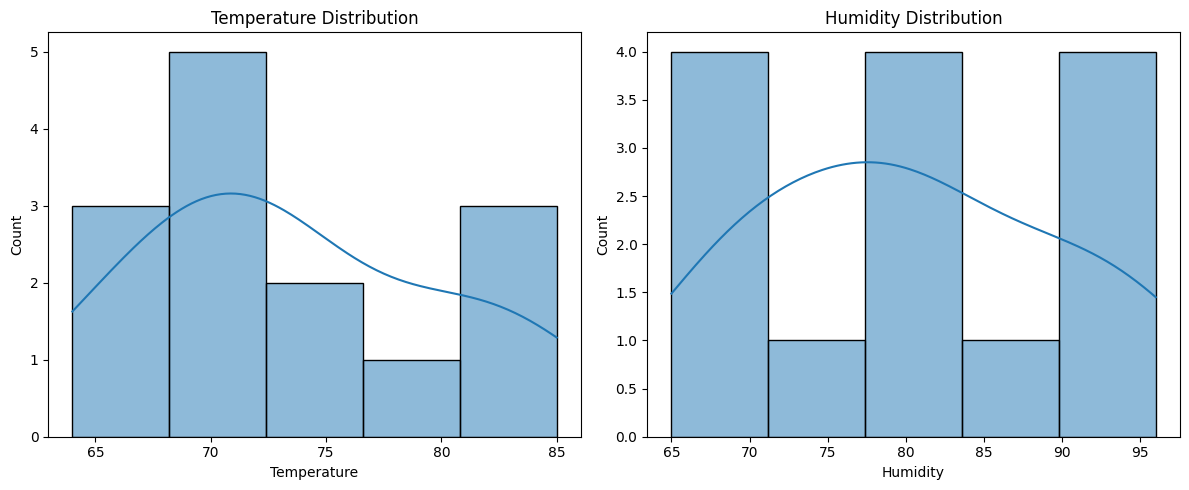

In [90]:
# Histogram of Temperature and Humidity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Temperature'], kde=True)
plt.title('Temperature Distribution')


plt.subplot(1, 2, 2)
sns.histplot(df['Humidity'], kde=True)
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()



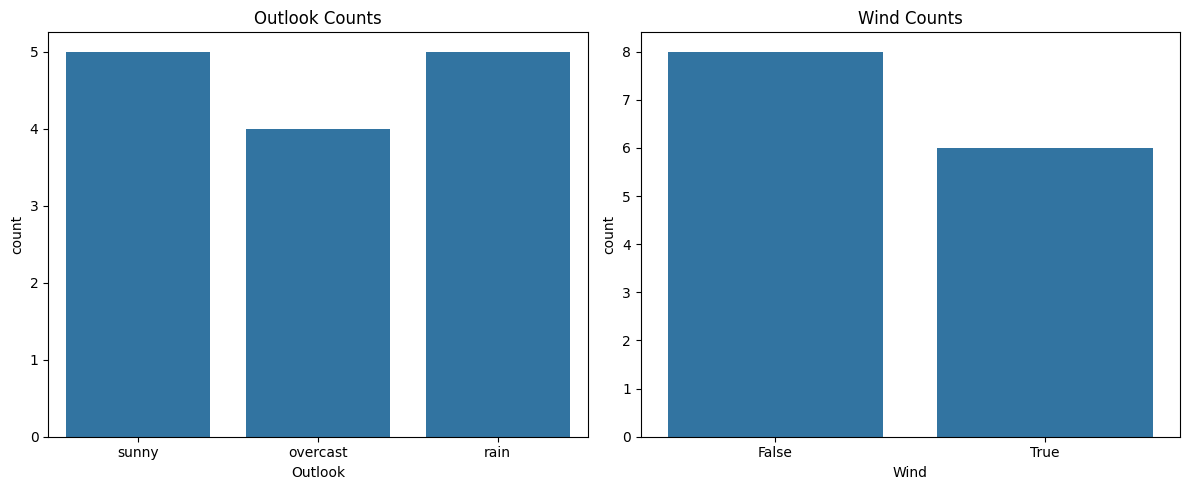

In [91]:

# Count plot for categorical variables: Outlook and Wind
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Outlook', data=df)
plt.title('Outlook Counts')

plt.subplot(1, 2, 2)
sns.countplot(x='Wind', data=df)
plt.title('Wind Counts')
plt.tight_layout()
plt.show()


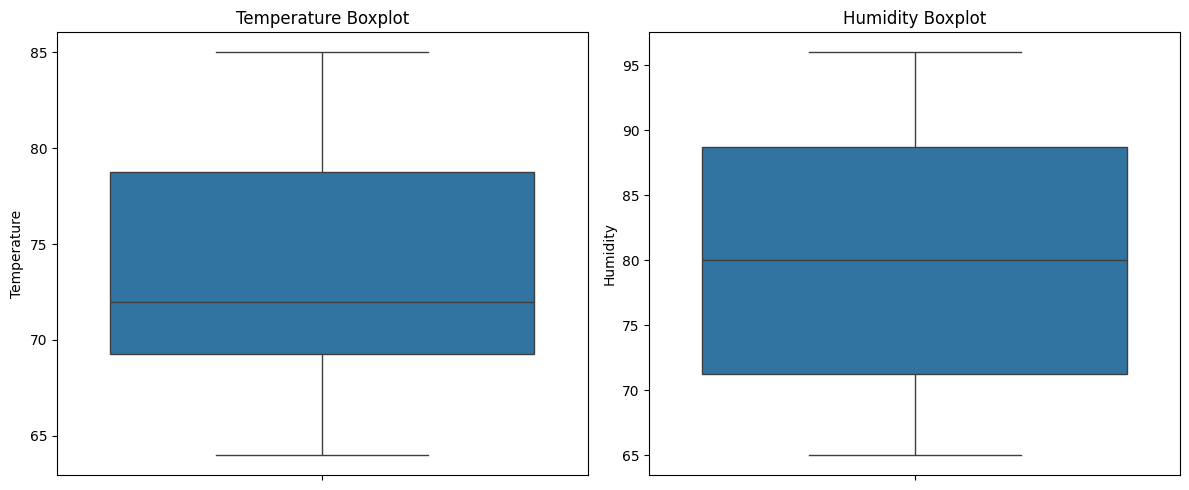

In [92]:

# Boxplot for Temperature and Humidity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='Temperature', data=df)
plt.title('Temperature Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y='Humidity', data=df)
plt.title('Humidity Boxplot')
plt.tight_layout()
plt.show()


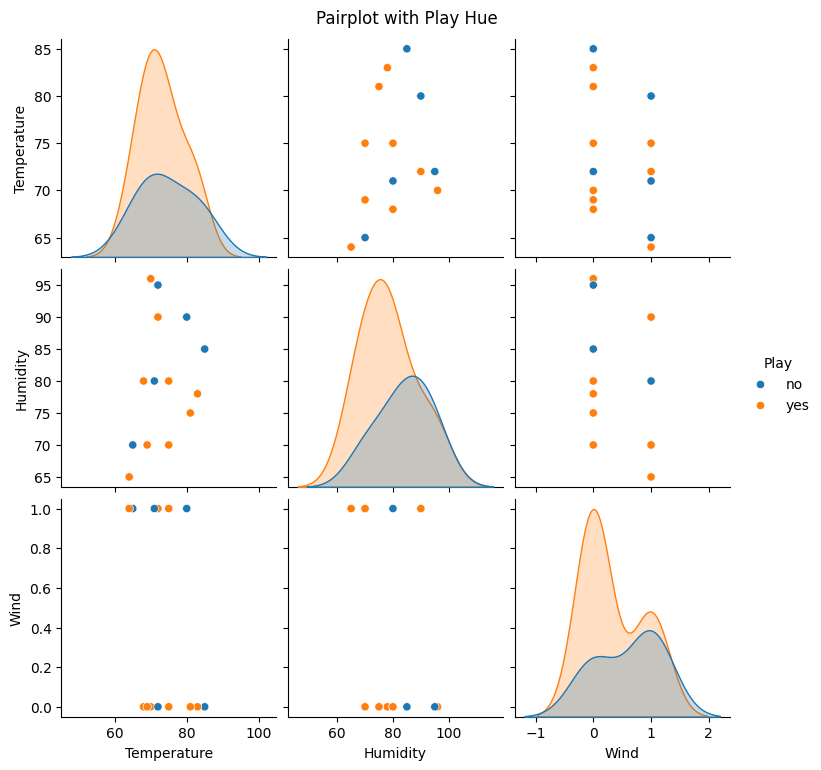

In [93]:
# Pairplot for all features
sns.pairplot( df, hue='Play')
plt.suptitle('Pairplot with Play Hue', y=1.02)  # Adjust title position
plt.show()


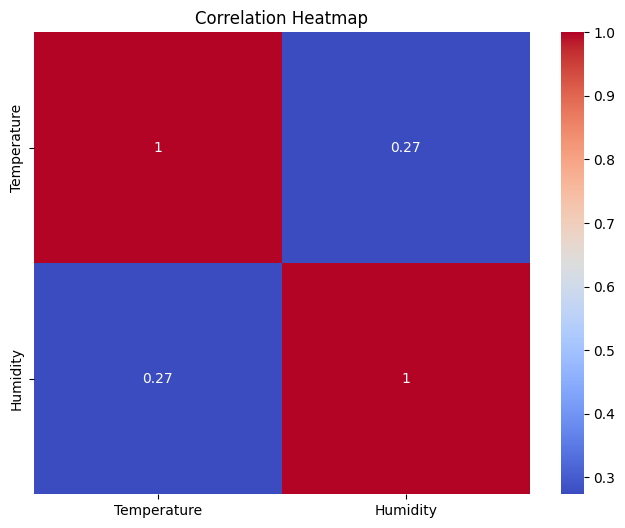

In [94]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [95]:
# Encoding categorical data
df['Outlook'] = df['Outlook'].astype('category').cat.codes
df['Wind'] = df['Wind'].astype('category').cat.codes

In [96]:
df.head()

,Play,Outlook,Temperature,Humidity,Wind
0,no,2,85,85,0
1,no,2,80,90,1
2,yes,0,83,78,0
3,yes,1,70,96,0
4,yes,1,68,80,0


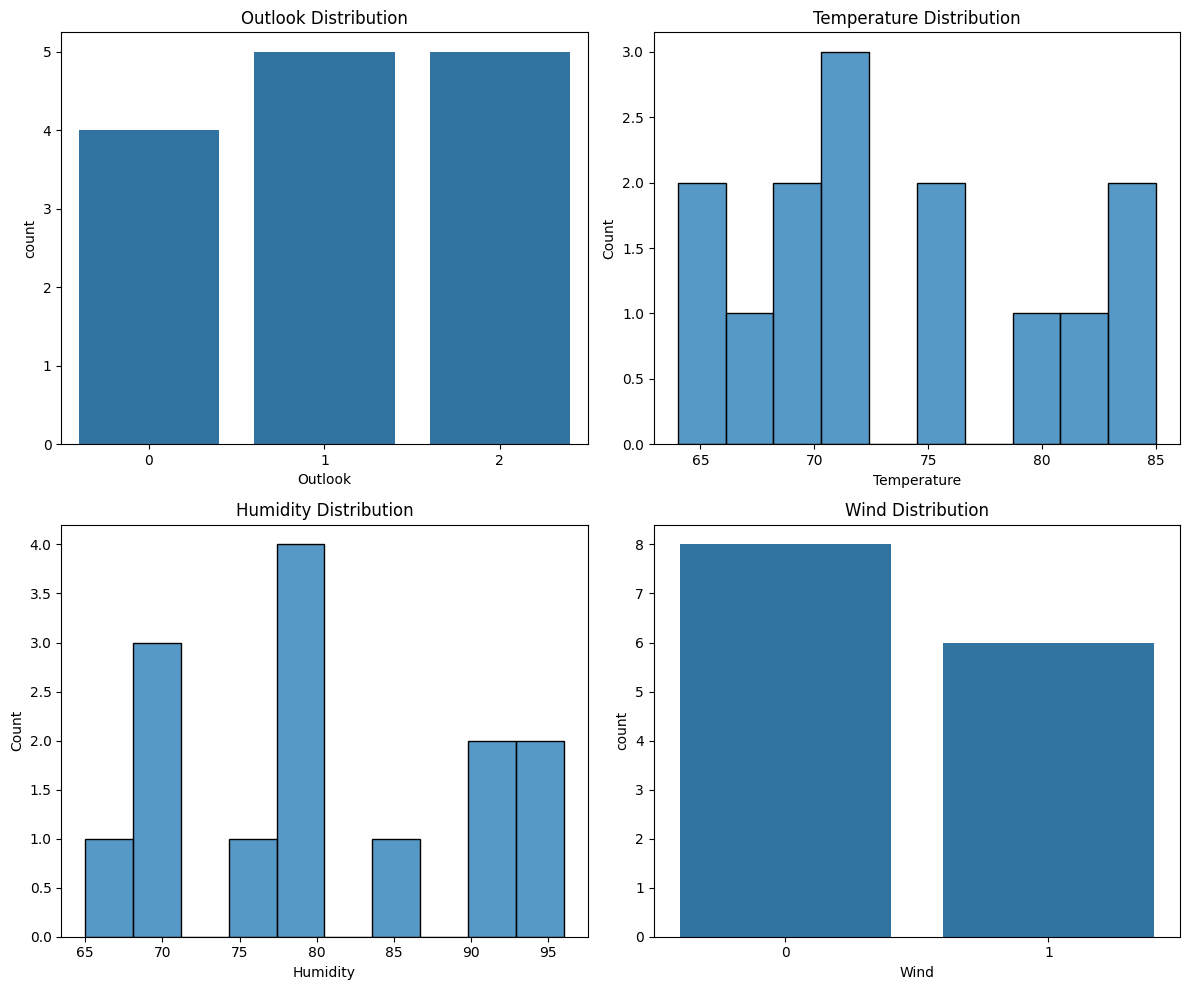

In [97]:
# Visualization after encoding
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming the dataset has the columns as per the user's earlier message
# Outlook, Temperature, Humidity, Wind, Play

# Convert categorical 'Play' to numeric for easier analysis
df['Play'] = df['Play'].map({'no': 0, 'yes': 1})

# Distribution of each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Outlook distribution
sns.countplot(x='Outlook', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Outlook Distribution')

# Temperature distribution
sns.histplot(df['Temperature'], bins=10, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Temperature Distribution')

# Humidity distribution
sns.histplot(df['Humidity'], bins=10, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Humidity Distribution')

# Wind distribution
sns.countplot(x='Wind', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Wind Distribution')

plt.tight_layout()
plt.show()





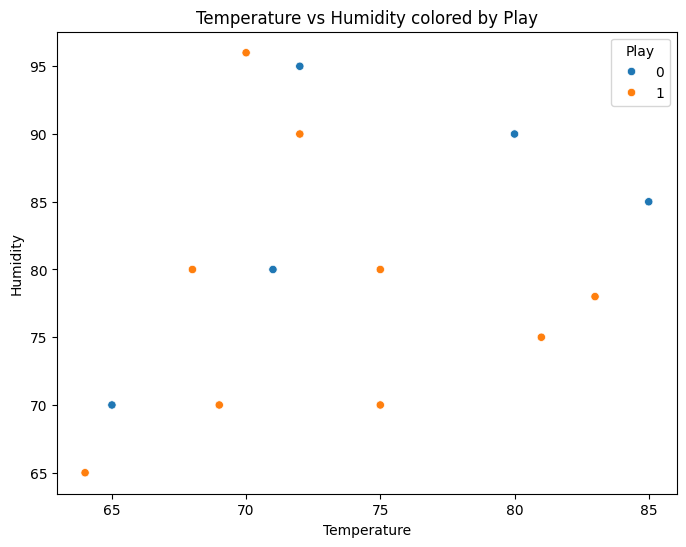

In [98]:
# Scatter plot for Temperature vs Humidity colored by Play
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Humidity', hue='Play', data=df)
plt.title('Temperature vs Humidity colored by Play')
plt.show()


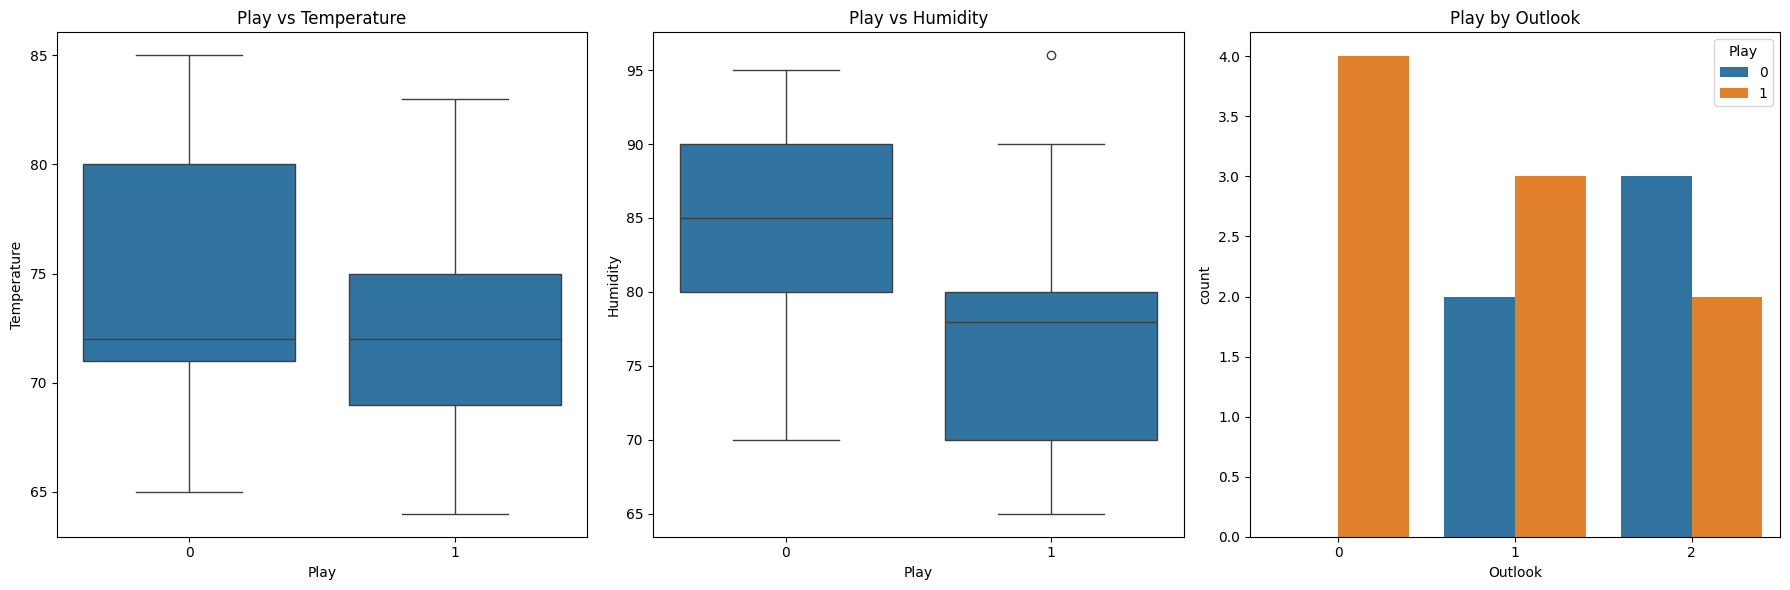

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# We will re-use the dataset created in the previous steps
# Boxplots for numerical features against Play
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Outlook is actually categorical, and not numeric, so for the boxplot
# we'll treat it as a factor and look at the distribution of Temperature
# and Humidity by the 'Play' feature instead

# Boxplot for Temperature by Play
sns.boxplot(x='Play', y='Temperature', data=df, ax=axes[0])
axes[0].set_title('Play vs Temperature')

# Boxplot for Humidity by Play
sns.boxplot(x='Play', y='Humidity', data=df, ax=axes[1])
axes[1].set_title('Play vs Humidity')

# As 'Outlook' and 'Wind' are categorical, it's better to use a different
# type of plot, such as a countplot or a violin plot. Here we use countplot for 'Outlook'.
sns.countplot(x='Outlook', hue='Play', data=df, ax=axes[2])
axes[2].set_title('Play by Outlook')

plt.tight_layout()
plt.show()


# Use k-NN method to build a solution classifier

In [100]:
from sklearn.model_selection import train_test_split
import numpy as np




In [101]:
# Setting feature matrix X and target vector y
X, y = df.drop('Play', axis=1), df['Play']

In [102]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

In [103]:
from sklearn.neighbors import KNeighborsClassifier

## Select the Number of Neighbors ('k')
k = 3


In [104]:
## Choose a Distance Metric
distance_metric = 'euclidean'

## Trying to calculate distance between ID 0 and ID 1
print(np.linalg.norm(X_train.loc[0].values - X_train.loc[1].values).round(3))

7.141


# Training Phase

In [105]:
# Initialize the k-NN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)

# "Train" the DummyClassifier (although no real training happens)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

# Classification Phase

In [106]:
from scipy.spatial import distance

# Compute the distances from the first row of X_test to all rows in X_train
distances = distance.cdist(X_test.iloc[0:1], X_train, metric='euclidean')

# Create a DataFrame to display the distances
distance_df = pd.DataFrame({
    'Train_ID': X_train.index,
    'Distance': distances[0].round(2)
}).set_index('Train_ID')

distance_df.sort_values(by='Distance')

,Distance
Train_ID,
3,2.45
1,9.49
4,15.56
0,16.40
2,20.35
5,26.00
6,31.13


In [107]:
# Use the k-NN Classifier to make predictions
y_pred = knn_clf.predict(X_test)
print("Label     :",list(y_test))
print("Prediction:",list(y_pred))

Label     : [0, 1, 1, 1, 1, 1, 0]
Prediction: [1, 1, 1, 1, 1, 1, 1]


# Evaluation Phase

In [108]:
# # Evaluation Phase
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy.round(4)*100}%')


In [109]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7142857142857143


In [110]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 2]
 [0 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      1.00      0.83         5

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
labels, predictions, accuracies = list(y_test), [], []

k_list = [3, 5, 7]
for k in k_list:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for k, pred in zip(k_list, predictions):
    df_predictions[f'k = {k}'] = pred

df_accuracies = pd.DataFrame({'Accuracy ': accuracies}, index=[f'k = {k}' for k in k_list]).T

print(df_predictions)
print(df_accuracies)


   Label  k = 3  k = 5  k = 7
0      0      1      1      1
1      1      1      1      1
2      1      1      0      1
3      1      1      1      1
4      1      1      1      1
5      1      1      0      1
6      0      1      0      1
           k = 3  k = 5  k = 7
Accuracy   71.43  57.14  71.43


# Key Parameters

In [112]:
labels, predictions, accuracies = list(y_test), [], []

k_list = [3, 5, 7]
for k in k_list:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for k, pred in zip(k_list, predictions):
    df_predictions[f'k = {k}'] = pred

df_accuracies = pd.DataFrame({'Accuracy ': accuracies}, index=[f'k = {k}' for k in k_list]).T

print(df_predictions)
print(df_accuracies)

   Label  k = 3  k = 5  k = 7
0      0      1      1      1
1      1      1      1      1
2      1      1      0      1
3      1      1      1      1
4      1      1      1      1
5      1      1      0      1
6      0      1      0      1
           k = 3  k = 5  k = 7
Accuracy   71.43  57.14  71.43


# Discuss how k-NN results are different from the previous decision tree / rules models


The k-Nearest Neighbors (k-NN) classifier and the Decision Tree classifier represent two fundamentally different approaches to classification tasks.

**Decision Tree Classifier:**
Creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
It is a type of model that divides the data into subsets based on the value of input features using a tree-like structure.
It makes decisions by splitting data into branches, leading to final decision nodes (leaves).
The Decision Tree you've shown is a visual representation of the rules derived from the training data. The nodes represent the features, and the branches represent the decision rules, leading to outcomes (class 'yes' or 'no').

**k-Nearest Neighbors (k-NN) Classifier:**
A non-parametric method used for classification and regression.
Predictions are made for a new instance (data point) by searching through the entire training set for the k most similar instances (the neighbors) and summarizing the output variable for those k instances.
For classification, the mode (or most common) class among the nearest neighbors is taken as the prediction.
It does not create a decision model but rather stores the entire dataset, so prediction is only done at the time a query is made, which can be computationally expensive.'

**Differences in Results:**
A Decision Tree may perform better when there are clear and distinct decision boundaries.
k-NN may perform better when the decision boundary is not well-defined or is highly irregular.
Decision Trees can be easier to interpret since they result in a set of rules, whereas k-NN's results are based on the proximity to other data points which might not be as intuitive.
Decision Trees are more susceptible to overfitting, especially if the tree is very deep. Pruning or setting a maximum depth can help prevent this.
k-NN's performance heavily relies on the number of neighbors selected (k) and the distance metric used. The choice of k can significantly affect the classifier's bias and variance.
In your case, the k-NN classifier with k=3 and k=7 achieved higher accuracy than the Decision Tree classifier (approximately 71.43% vs. 66.67%). This might suggest that for this particular dataset, the pattern of similarity among neighbors captured by k-NN is better at making predictions than the splits made by the Decision Tree. However, when k=5, k-NN's accuracy dropped, which indicates the sensitivity of k-NN to the choice of k.

Moreover, it's important to consider other metrics beyond accuracy, such as precision, recall, and the F1 score, especially if the class distribution is imbalanced. It would also be beneficial to perform cross-validation to assess the robustness of these mode